# Probabilistic Localization

Implements markov localization as in the example in Chapter 8 of "Elements of Robotics" (free download at http://elementsofrobotics.epfl.ch/)

## World definition
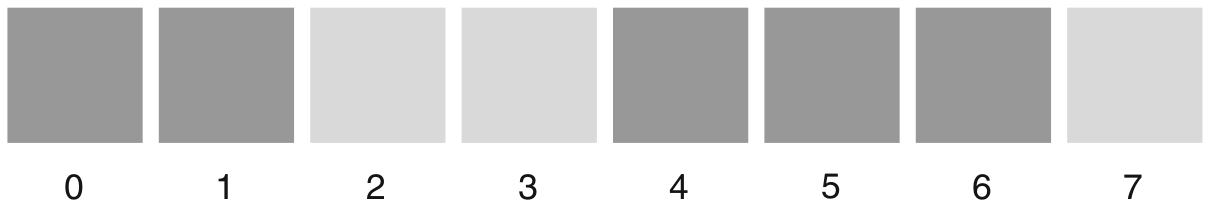



In [1]:
import numpy as np

#  Initial belief array:
#    uniform distribution of the robot's location
def uniform():
    return np.ones(8)/8

#  There are doors at positions 0,1,4,5,6
doors = np.array([True, True, False, False, True, True, True, False])

#  Move belief array a right (cyclic)
def move_right(a):
    return np.roll(a, shift=1)

def sense(a, door):
    a[~(doors == door)] = 0
    a = a/np.sum(a)
    return a

In [8]:
import matplotlib.pyplot as plt
def viz(a):
    fig,ax = plt.subplots(figsize=(8,1))
    ax.imshow(a[np.newaxis,:],vmin=0,vmax=1)
    for i in range(len(a)):
        ax.text(i, 0, f"{a[i]:.2f}", ha="center", va="center", color="w")
    ax.set(yticks=[],
           xticks=range(len(a)))
    plt.show()

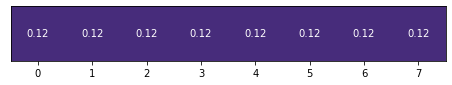

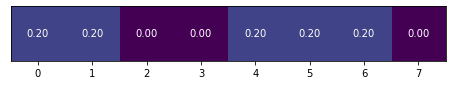

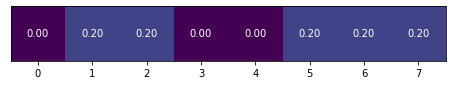

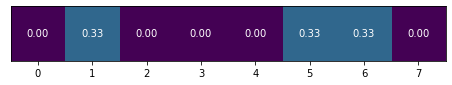

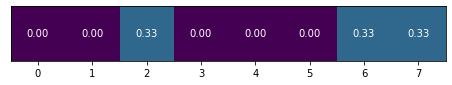

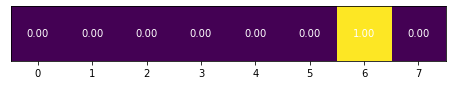

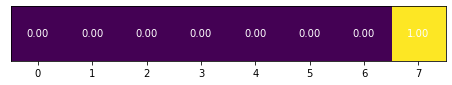

In [9]:
p = uniform()
viz(p)
p = sense(p, door=True)
viz(p)
p = move_right(p)
viz(p)
p = sense(p, door=True)
viz(p)
p = move_right(p)
viz(p)
p = sense(p, door=True)
viz(p)
p = move_right(p)
viz(p)

In [4]:
def move_right_unc(a):
    out = np.zeros_like(a)
    q = [0.1, 0.9, 0]
    for i,tq in enumerate(q):
        out = out + tq*np.roll(a, shift=i)
    return out

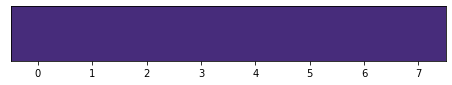

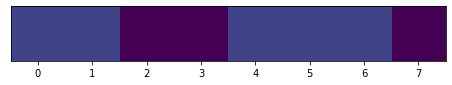

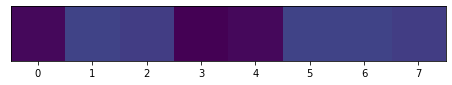

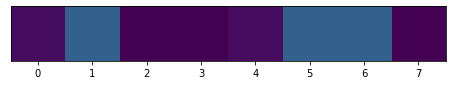

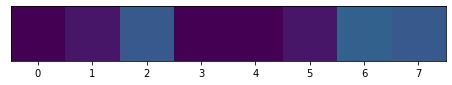

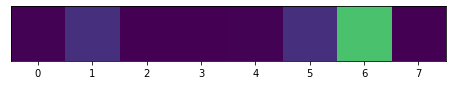

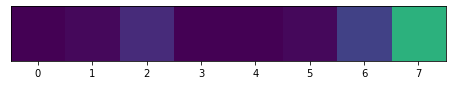

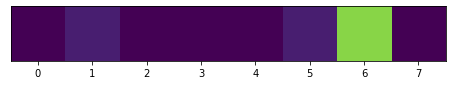

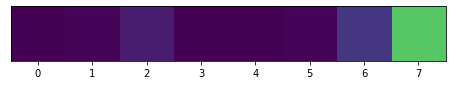

In [5]:
p = uniform()
viz(p)
p = sense(p, door=True)
viz(p)
p = move_right_unc(p)
viz(p)
p = sense(p, door=True)
viz(p)
p = move_right_unc(p)
viz(p)
p = sense(p, door=True)
viz(p)
p = move_right_unc(p)
viz(p)
p = sense(p, door=True)
viz(p)
p = move_right_unc(p)
viz(p)